# ESERCIZIO 12

### MNIST with Keras

The goal of exercise 12 is to use deep neural network models, implemented in the Keras python package, to recognize and distinguish between the ten handwritten digits (0-9).

The MNIST dataset comprises $70000$ handwritten digits, each of which comes in a square image, divided into a $28\times 28$ pixel grid. Every pixel can take on $256$ gradation of the gray color, interpolating between white and black, and hence each data point assumes any value in the set $\{0,1,\dots,255\}$. Since there are $10$ categories in the problem, corresponding to the ten digits, this problem represents a generic **classification task**. 

Provo a valutare la DNN con tre ottimizzatori diversi: Adam, SGD ed RMSprop.


In [ ]:


import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop
from keras.datasets import mnist
from keras.utils import to_categorical
from tensorflow.keras import backend as K

# === Load e preprocess ===
(img_rows, img_cols) = (28, 28)
(num_classes) = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape
X_train = X_train.reshape(X_train.shape[0], img_rows * img_cols).astype('float32') / 255
X_test_flat = X_test.reshape(X_test.shape[0], img_rows * img_cols).astype('float32') / 255

# one-hot encoding
Y_train = to_categorical(y_train, num_classes)
Y_test = to_categorical(y_test, num_classes)

# === Modello base ===
def create_DNN():
    model = Sequential()
    model.add(Dense(128, input_shape=(img_rows * img_cols,), activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# === Ottimizzatori ===
optimizers = {
    'SGD': SGD(),
    'Adam': Adam(),
    'RMSprop': RMSprop()
}

results = {}

# === Training con ogni ottimizzatore ===
for name, opt in optimizers.items():
    print(f"\n Training with optimizer: {name}")
    
    model = create_DNN()
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    history = model.fit(X_train, Y_train,
                        validation_split=0.2,
                        epochs=20,
                        batch_size=128,
                        verbose=0)

    score = model.evaluate(X_test_flat, Y_test, verbose=0)

    results[name] = {
        'model': model,
        'history': history,
        'test_loss': score[0],
        'test_accuracy': score[1]
    }

    print(f"Test accuracy: {score[1]:.4f}, Test loss: {score[0]:.4f}")

2025-07-08 11:20:16.755353: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-08 11:20:17.020158: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-08 11:20:17.322004: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751966417.739271   54175 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751966417.824552   54175 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751966418.925706   54175 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin


 Training with optimizer: SGD


2025-07-08 11:20:33.925138: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.
2025-07-08 11:20:39.653244: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37632000 exceeds 10% of free system memory.


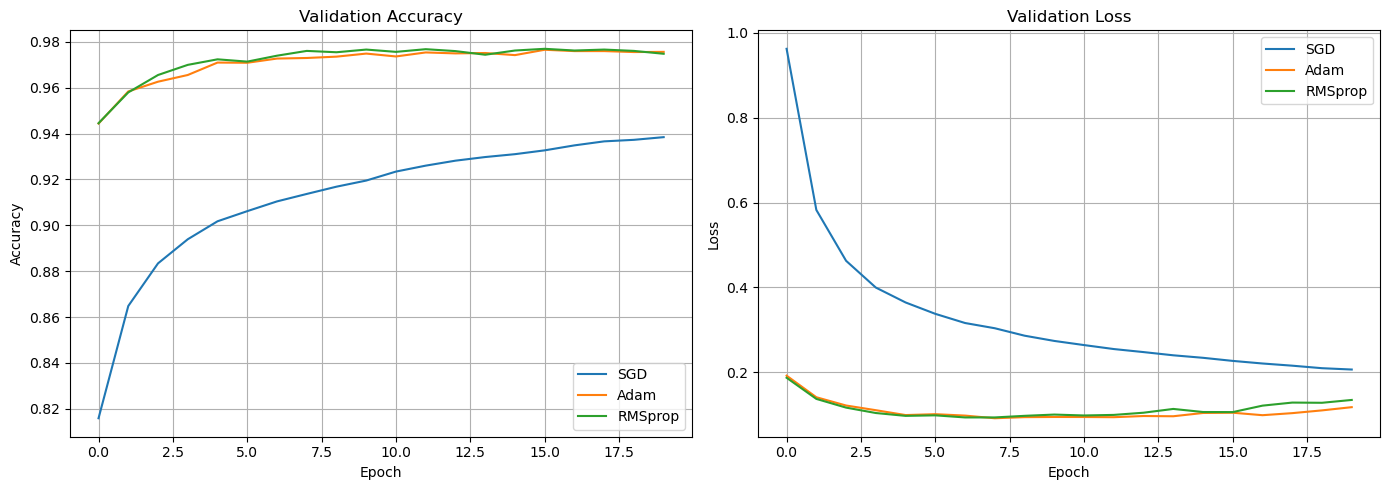

In [ ]:
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
for name in results:
    plt.plot(results[name]['history'].history['val_accuracy'], label=name)
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
for name in results:
    plt.plot(results[name]['history'].history['val_loss'], label=name)
    plt.title('Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


la forma di X_train sarebbe 60000 (numero di immagini per il training contenenti i disegni degli interi) ,  784, sono il numero di pixel contenuti da ciascuna immagine, che da matrice sono stati "appiattiti" ad un vettore monodimensionale.
Y_train sono gli output, ho 60000 elementi ciascuno è un vettore che rappresenta un intero come vettore binario.

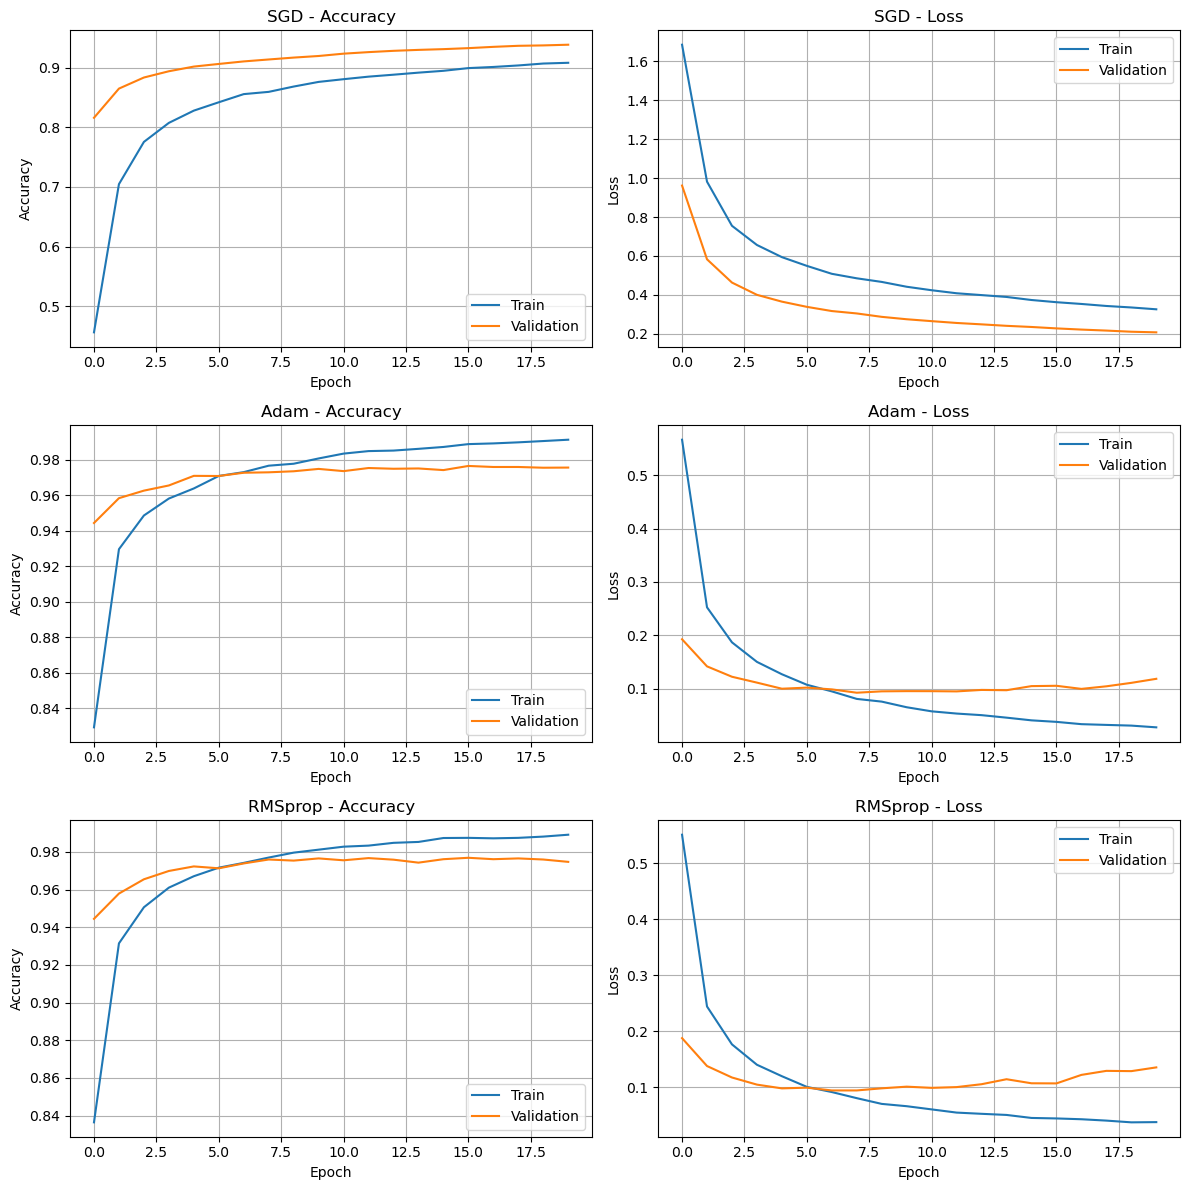

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

opt_names = ['SGD', 'Adam', 'RMSprop']

for i, name in enumerate(opt_names):
    hist = results[name]['history'].history

    # Accuracy
    axs[i, 0].plot(hist['accuracy'])
    axs[i, 0].plot(hist['val_accuracy'])
    axs[i, 0].set_title(f'{name} - Accuracy')
    axs[i, 0].set_ylabel('Accuracy')
    axs[i, 0].set_xlabel('Epoch')
    axs[i, 0].legend(['Train', 'Validation'], loc='best')
    axs[i, 0].grid(True)

    # Loss
    axs[i, 1].plot(hist['loss'])
    axs[i, 1].plot(hist['val_loss'])
    axs[i, 1].set_title(f'{name} - Loss')
    axs[i, 1].set_ylabel('Loss')
    axs[i, 1].set_xlabel('Epoch')
    axs[i, 1].legend(['Train', 'Validation'], loc='best')
    axs[i, 1].grid(True)

plt.tight_layout()
plt.show()

Creo un modello con Adam che risulta essere ottimale

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


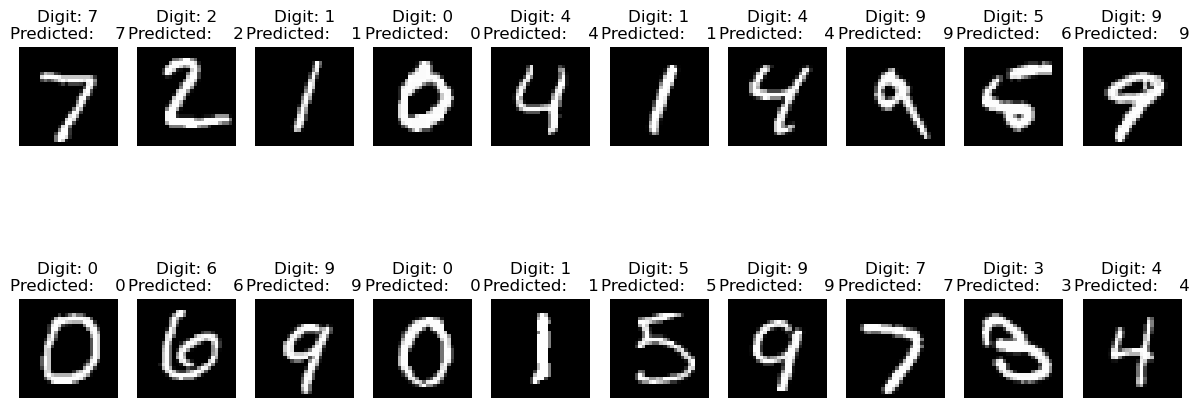

In [ ]:
model = create_DNN()
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    validation_split=0.2,
                    epochs=20,
                    batch_size=128,
                    verbose=0)

score = model.evaluate(X_test_flat, Y_test, verbose=0)

X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1) #gli ultimi 3 parametri di fatto ci dicono le componenti della matrice, la prima ci dice il numero di elementi,
# di fatto ho ottenuto u4-dimesionale, un tensore, ovvero 10000 elementi che sono matrici 2D l'ultimo elemento serve a specificare i channels dell'immagine, 
#in questo caso è in bianco e nero quindi metto un solo channel.
plt.figure(figsize=(15, 6)) 
for i in range(20):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

### Exercise 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. I have merged step 2 and 3 in the following definition of `create_CNN()` 

 ### Soluzione:
 
 Il mio modello di Convolutional Neural  Network inizia con un layer convoluzionale che utilizza 10 filtri di dimensione 5x5, seguito da un layer di max pooling con finestra 2x2 che riduce la dimensionalità spaziale. Successivamente, viene aggiunto un secondo layer convoluzionale con 20 filtri sempre di dimensione 5x5, anch'esso seguito da un layer di max pooling 2x2 e da un layer di dropout con probabilità 0.25, che serve a ridurre l’overfitting durante l’addestramento. Dopo questa parte convoluzionale, la rete appiattisce i dati attraverso un layer di flattening per passare alla parte densa completamente connessa, composta da un primo layer con 50 neuroni e funzione di attivazione ReLU, e infine un layer di output con tanti neuroni quanti sono i possibili output (indicati da num_classes), con attivazione softmax per produrre una distribuzione di probabilità sulle classi. In totale la rete contiene due layer convoluzionali, due layer di max pooling, un layer di dropout, un layer flatten e due layer densi.

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam

# reshape data (controllo per backend)
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print(f"{X_train.shape[0]} train samples")
print(f"{X_test.shape[0]} test samples")

# funzione per creare la CNN
def create_CNN():
    model = Sequential()
    
    # Primo blocco conv + pool
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Secondo blocco conv + pool + dropout
    model.add(Conv2D(20, kernel_size=(5, 5), activation='relu'))  # NON serve input_shape qui
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Flatten + Dense
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()  
    return model  


X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)
60000 train samples
10000 test samples


In [ ]:
# training parameters
batch_size = 32
epochs = 5 # INSERT HERE AN ADEQUATE NUMBER OF EPOCHS!

# create the deep conv net
model_CNN=create_CNN()
model_CNN.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='Adam',  # o 'Adam', 'RMSprop', ecc.
    metrics=['accuracy']  # usa 'accuracy' invece di 'acc' se stai usando Keras ≥2.3
)

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 10)     │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 20)       │         5,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 4, 4, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 50)             │        16,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,840 (85.31 KB)

 Trainable params: 21,840 (85.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.8531 - loss: 0.4699 - val_accuracy: 0.9808 - val_loss: 10.1508
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9727 - loss: 0.0924 - val_accuracy: 0.9843 - val_loss: 7.5818
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9800 - loss: 0.0659 - val_accuracy: 0.9863 - val_loss: 6.2677
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9831 - loss: 0.0544 - val_accuracy: 0.9867 - val_loss: 6.3861
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9854 - loss: 0.0471 - val_accuracy: 0.9892 - val_loss: 5.5606
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9865 - loss: 6.2837 

Test loss: 5.560629844665527
Test accuracy: 0.9891999959945679


Adesso carico le immagini da me prodotte dalla cartella `/numeri` e vedo se il modello CNN riesce a predire i valori veri delle immagini.

Image size: 28x28
(28, 28)
Image size: 28x28
(28, 28)
Image size: 28x28
(28, 28)
Image size: 28x28
(28, 28)
Image size: 28x28
(28, 28)
Image size: 28x28
(28, 28)
Image size: 28x28
(28, 28)
Image size: 28x28
(28, 28)
Image size: 28x28
(28, 28)
Image size: 28x28
(28, 28)


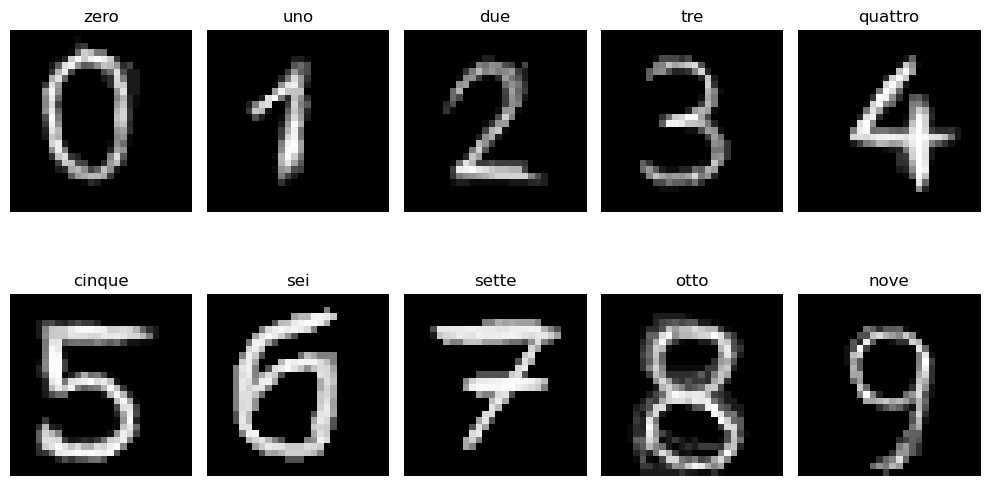

In [ ]:
from PIL import Image
import os

folder = "./numeri/"
filenames = ["zero.png", "uno.png", "due.png", "tre.png", "quattro.png", 
             "cinque.png", "sei.png", "sette.png", "otto.png", "nove.png"]


plt.figure(figsize=(10,6))
k=0
data_full = []

for fname in filenames:
    filepath = os.path.join(folder, fname)
    digit_in = Image.open(filepath).convert('L')
    #digit_in = Image.open("8b.png").convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE
    
    ydim, xdim = digit_in.size
    
    print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load()
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]
    
    data /= 255

    data_full.append(data)
    
    ax = plt.subplot(2, 5, k + 1)
    plt.imshow(data, cmap='gray')
    plt.title(filenames[k][:-4])  # Remove .png extension for title
    plt.axis('off')
    print(data.shape)
    k+=1

plt.tight_layout()
plt.show()

(28, 28)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
(28, 28)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
(28, 28)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
(28, 28)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
(28, 28)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
(28, 28)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
(28, 28)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
(28, 28)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
(28, 28)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
(28, 28)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


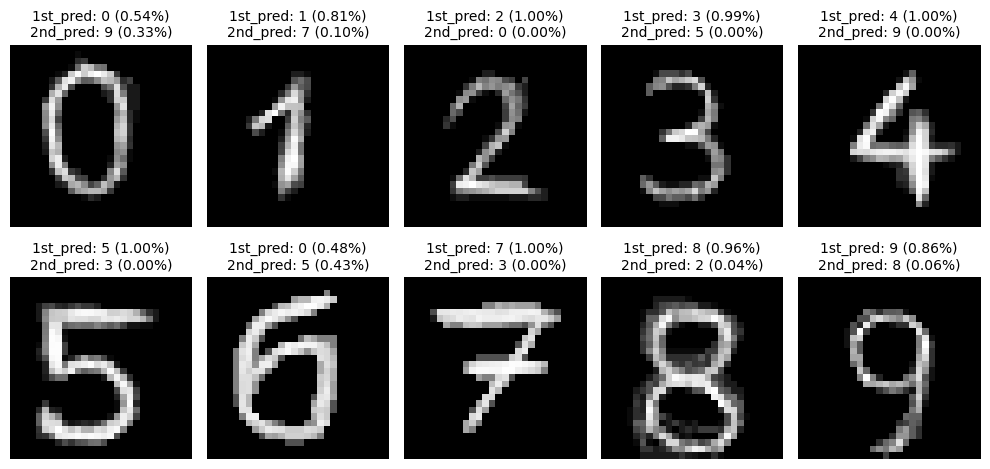

In [ ]:
k=0
plt.figure(figsize=(10, 5))  
for fname in filenames:

    print(data_full[k].shape)
    sample = data_full[k].reshape(1, xdim, ydim, 1)
    print(sample.shape)
    
    pred_0 = model_CNN.predict(sample)  # pred_0 ha shape (1, 10)
    pred_values = pred_0[0]             # ottieni l'array di probabilità (shape: (10,))
    
    top_2_indices = pred_values.argsort()[-2:][::-1]
    first_class = top_2_indices[0]
    second_class = top_2_indices[1]
    
    first_prob = pred_values[first_class]
    second_prob = pred_values[second_class]
    
    data = data_full[k].reshape(xdim, ydim)
    
    ax = plt.subplot(2, 5, k + 1)
    plt.imshow(data, cmap='gray')
    plt.title(f"1st_pred: {first_class} ({first_prob:.2f}%)\n2nd_pred: {second_class} ({second_prob:.2f}%)", fontsize=10)
    plt.axis('off')
    
    k += 1

plt.tight_layout()
plt.show()

La figura mostra le predizioni del modello con anche le probabilità associata a ciascuna predizione e la seconda predizione più probabile.
Noto che il modello funziona abbastanza bene anche se ha fallito la predizione sul 6, classificandolo come un 9, probabilmente per la somiglianza tra le due figure